In [1]:
import pandas as pd

In [2]:
net1_dir= '../meerCRAB_output/NET1/T9_NRD/classified_examples/contigency_table.csv'
net2_dir= '../meerCRAB_output/NET2/T9_NRD/classified_examples/contigency_table.csv'
net3_dir= '../meerCRAB_output/NET3/T9_NRD/classified_examples/contigency_table.csv'

In [3]:
table1 = pd.read_csv(net1_dir)
table2 = pd.read_csv(net2_dir)
table3 = pd.read_csv(net3_dir)

In [4]:
network1='NET1_ML_LABEL'
network2='NET2_ML_LABEL'
network3='NET3_ML_LABEL'

table1 = table1[['transientid','y_true',network1]]
table2 = table2[['transientid',network2]]
table3 = table3[['transientid',network3]]

In [5]:
## for For MeerCRAB 2 and MeerCRAB 3
#merge_table_1 = table1[['transientid','y_true']].merge(table2,on='transientid')
#merge_table = merge_table_1.merge(table3,on='transientid')
#merge_table

,transientid,y_true,NET2_ML_LABEL,NET3_ML_LABEL
0,844750,1,1,1
1,2673646,0,0,0
2,155823,0,0,0
3,553776,0,0,0
4,2298829,0,0,0
...,...,...,...,...
1090,1107291,1,1,1
1091,3000879,1,1,1
1092,6873,1,1,1
1093,140840,0,0,0


In [11]:
## For MeerCRAB 1 and MeerCRAB2
merge_table = table1.merge(table3,on='transientid')
merge_table

,transientid,y_true,NET1_ML_LABEL,NET3_ML_LABEL
0,844750,1,1,1
1,2673646,0,0,0
2,155823,0,0,0
3,553776,0,0,0
4,2298829,0,0,0
...,...,...,...,...
1090,1107291,1,1,1
1091,3000879,1,1,1
1092,6873,1,1,1
1093,140840,0,0,0


In [12]:
from mlxtend.evaluate import mcnemar_table,mcnemar, mcnemar_tables
from mlxtend.plotting import checkerboard_plot
import matplotlib.pylab as plt
import numpy as np

In [13]:
y_true = np.array(merge_table['y_true'])
y_mod1 = np.array(merge_table[network1])
y_mod2 = np.array(merge_table[network3])

tb = mcnemar_table(y_true,y_mod1,y_mod2)
tb

array([[1071,   18],
       [   1,    5]])

<Figure size 432x288 with 0 Axes>

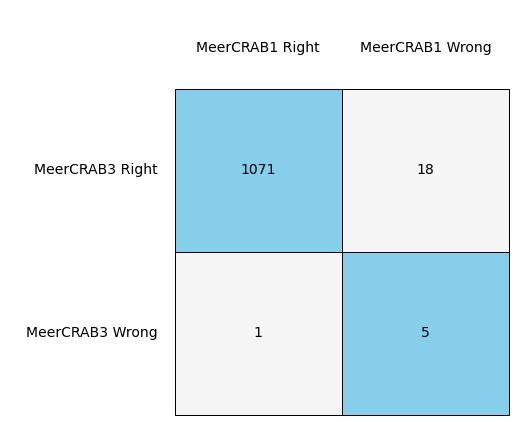

In [14]:
plt.figure()
brd = checkerboard_plot(tb,
                       figsize=(6,6),
                       fmt='%d',
                       col_labels=['MeerCRAB1 Right', 'MeerCRAB1 Wrong'],
                       row_labels=['MeerCRAB3 Right', 'MeerCRAB3 Wrong'],
                       cell_colors=['skyblue','whitesmoke'],
                       font_colors = ['black','black'],
                       fontsize=30)
plt.savefig(network1+network3+'_mcnemar.pdf',bbox_inches='tight', pad_inches=0.02)
plt.show()

In [15]:
chi2, p = mcnemar(tb,exact=True)
print('chi-squared:',chi2)
print('p-value', p)

chi-squared: 1
p-value 7.62939453125e-05


# 